In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = []
with open('Admission_Predict.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            data.append(row)

In [12]:
data = np.array(data, dtype='float64')

### Definicion de Tamaños de Entrenamiento, Cross Validation, y Test

In [13]:
# TODO: shuffle array
split_data = np.split(data, [300, 375, 400])

training_data = split_data[0]
cross_validation_data = split_data[1]
test_data = split_data[2]

### Escoger Columnas que Deseamos
#### Eliminamos: SerialNo, UniversityRating, Research

In [14]:
#data = np.delete(data, 0, 1)
#data = np.delete(data, 2, 1)
#data = np.delete(data, 5, 1)
#data

# escoger 6ta columna
training_data = np.delete(training_data, 0, 1)
training_data = np.delete(training_data, 0, 1)
training_data = np.delete(training_data, 0, 1)
training_data = np.delete(training_data, 0, 1)
training_data = np.delete(training_data, 0, 1)
training_data = np.delete(training_data, 0, 1)
training_data = np.delete(training_data, 1, 1)

In [15]:
X = training_data[:, 0]
X[0]

9.65

In [16]:
y = training_data[:, 1]
y[0]

0.92

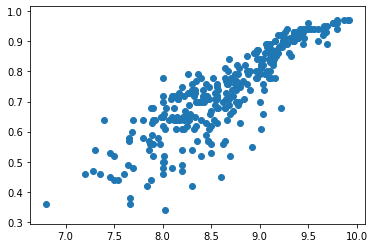

In [17]:
# x vs probability of admission
plt.scatter(X, y)

In [18]:
y = y.reshape(len(y), 1)
y.shape

(300, 1)

In [19]:
X = np.vstack((np.ones(X.shape[0]), X)).T
X.shape
X[0]

array([1.  , 9.65])

### Funciones de Regresion Lineal

In [20]:
def linear_cost(X, y, theta):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    return sq.sum() / (2 * m)

def linear_cost_derivate(X, y, theta):
    h = np.matmul(X, theta)
    m, _ = X.shape
    return np.matmul((h - y).T, X).T / m

def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.01,
        treshold=0.0001,
        max_iter=10000):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta)
        i += 1
        costs.append(cost(X, y, theta))
        gradient_norms.append(cost_derivate(X, y, theta))
    return theta, costs, gradient_norms

In [21]:
theta_0 = np.random.rand(X.shape[1], 1)
#theta_0.shape
theta_0

array([[0.20483184],
       [0.53753271]])

### Ejecutar descenso de gradiente para encontrar nuestros coeficientes (theta)

In [27]:
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.01,
    treshold=0.001,
    max_iter=100000
)

print ('Valores de Teta:', theta)

Valores de Teta: [[-0.86728624]
 [ 0.18499406]]


### Gráfica de Codo

### Gráfica de Modelo de Regresión Lineal

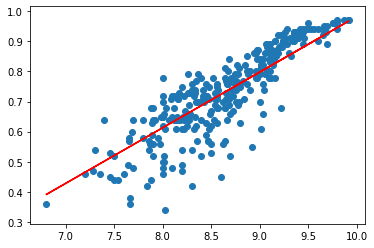

In [28]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color='red')
plt.show()